In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Nived Shah\AppData\Local\Temp\ipykernel_19760\1867715436.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv('Frogs_MFCCs.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


### Constants



In [13]:
target_col_names = ['Family', 'Genus', 'Species']

### Quick Feature Analysis

Data types:

The class lables are object types, so we will need to vectorize them in some way in future to use them


In [5]:
df.dtypes

MFCCs_ 1    float64
MFCCs_ 2    float64
MFCCs_ 3    float64
MFCCs_ 4    float64
MFCCs_ 5    float64
MFCCs_ 6    float64
MFCCs_ 7    float64
MFCCs_ 8    float64
MFCCs_ 9    float64
MFCCs_10    float64
MFCCs_11    float64
MFCCs_12    float64
MFCCs_13    float64
MFCCs_14    float64
MFCCs_15    float64
MFCCs_16    float64
MFCCs_17    float64
MFCCs_18    float64
MFCCs_19    float64
MFCCs_20    float64
MFCCs_21    float64
MFCCs_22    float64
Family       object
Genus        object
Species      object
RecordID      int64
dtype: object

Missing Value Analysis

None of the columns have missing values, hence no need to perform any data imputation.

In [6]:
df.isnull().sum()

MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64

### Target Variable Analysis

We will plot the histograms to get an idea of the frequency of the different categories of different target classes


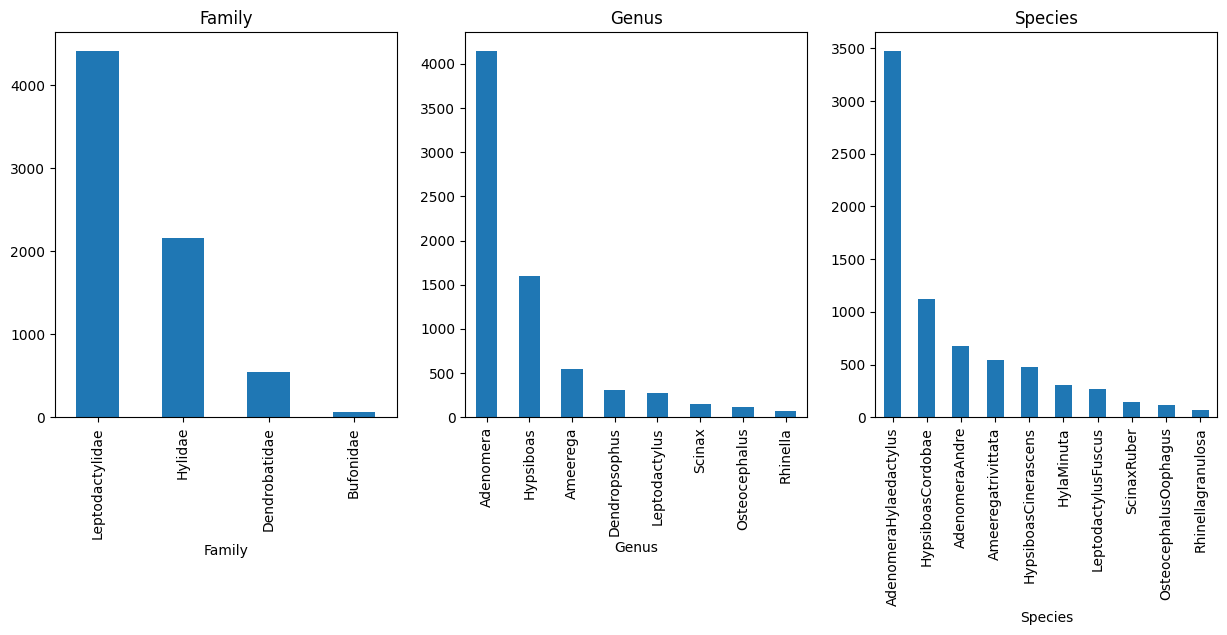

Family
Leptodactylidae    0.614315
Hylidae            0.300903
Dendrobatidae      0.075330
Bufonidae          0.009451
Name: proportion, dtype: float64


Genus
Adenomera        0.576789
Hypsiboas        0.221404
Ameerega         0.075330
Dendropsophus    0.043085
Leptodactylus    0.037526
Scinax           0.020570
Osteocephalus    0.015844
Rhinella         0.009451
Name: proportion, dtype: float64


Species
AdenomeraHylaedactylus    0.483391
HypsiboasCordobae         0.155803
AdenomeraAndre            0.093398
Ameeregatrivittata        0.075330
HypsiboasCinerascens      0.065601
HylaMinuta                0.043085
LeptodactylusFuscus       0.037526
ScinaxRuber               0.020570
OsteocephalusOophagus     0.015844
Rhinellagranulosa         0.009451
Name: proportion, dtype: float64




In [17]:
# display the histogram of the target columns (frequency of each cateogry within the target columns)
# the plots should be in 1 row, 3 columns

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(target_col_names):
    df[col].value_counts().plot(kind='bar', ax=ax[i])
    ax[i].set_title(col)
plt.show()

# print the percentage of each category in the target columns
for col in target_col_names:
    print(df[col].value_counts(normalize=True))
    print('\n')

### Statistical Analysis

In [19]:
df.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


In [18]:
X_df = df.drop(['Family', 'Genus', 'Species', 'RecordID'], axis=1)
y_df = df[['Family', 'Genus', 'Species']]

print(X_df.shape)

(7195, 22)


Visualizing the distribution of the features


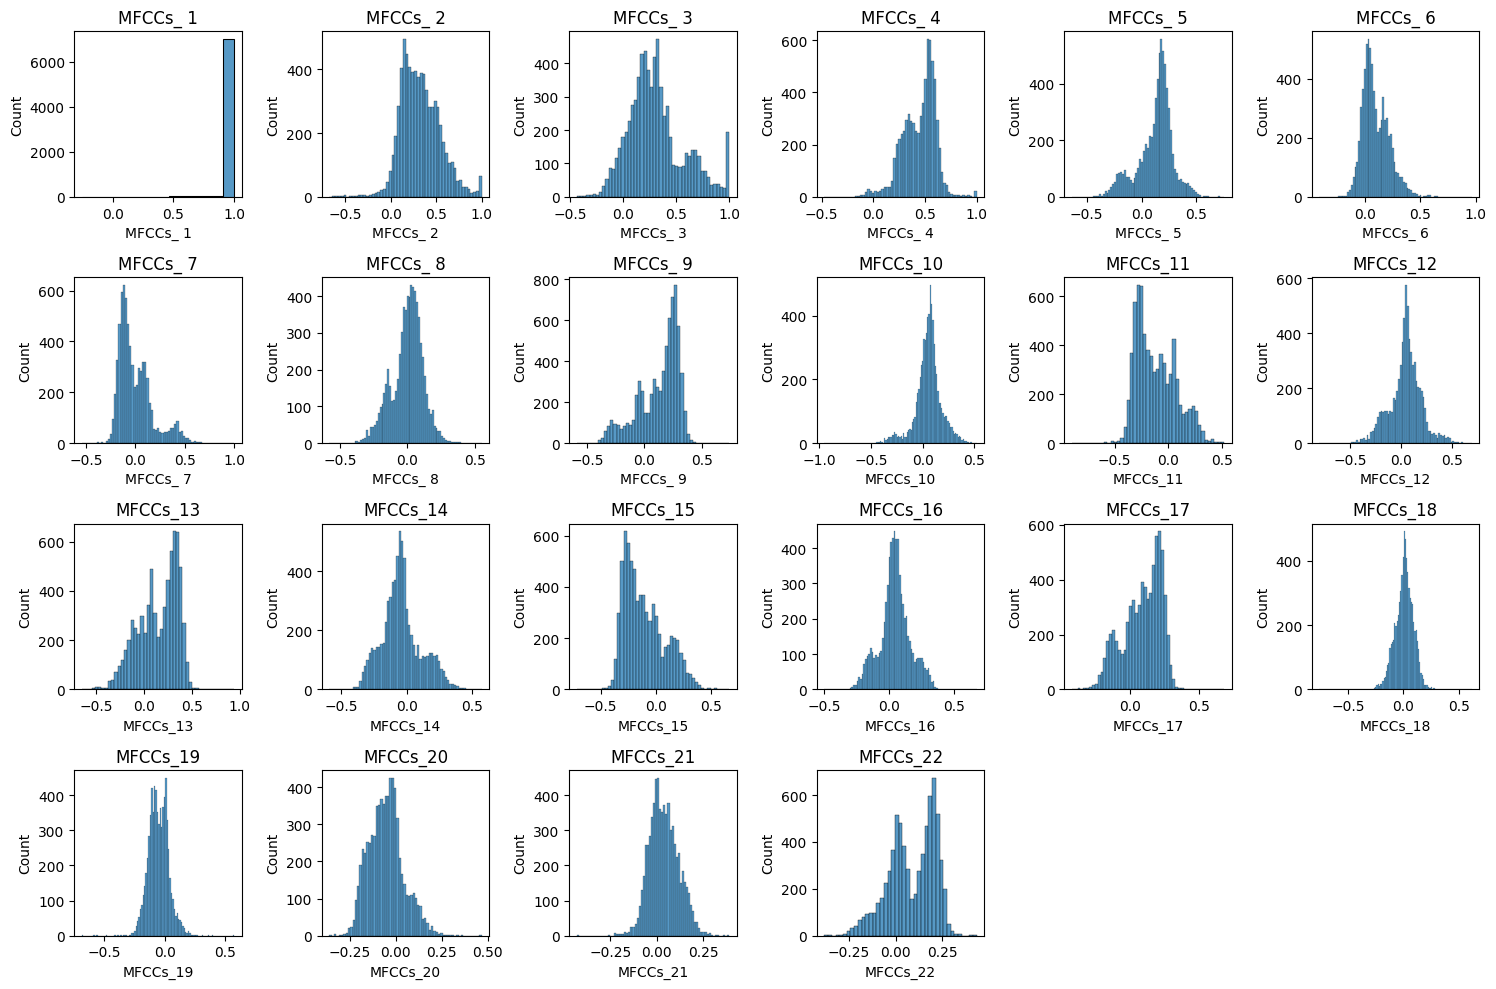

In [ ]:
# plot the distribution of the features
plt.figure(figsize=(15, 10))
for i, col in enumerate(X_df.columns):
    plt.subplot(4, 6, i+1)
    sns.histplot(X_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Handling Outliers

We will find the z-score of each feature and if it is above a threshold, we will remove those points.
Generally the threshold is set to be 3*sigma (3-std)

(6668, 26)


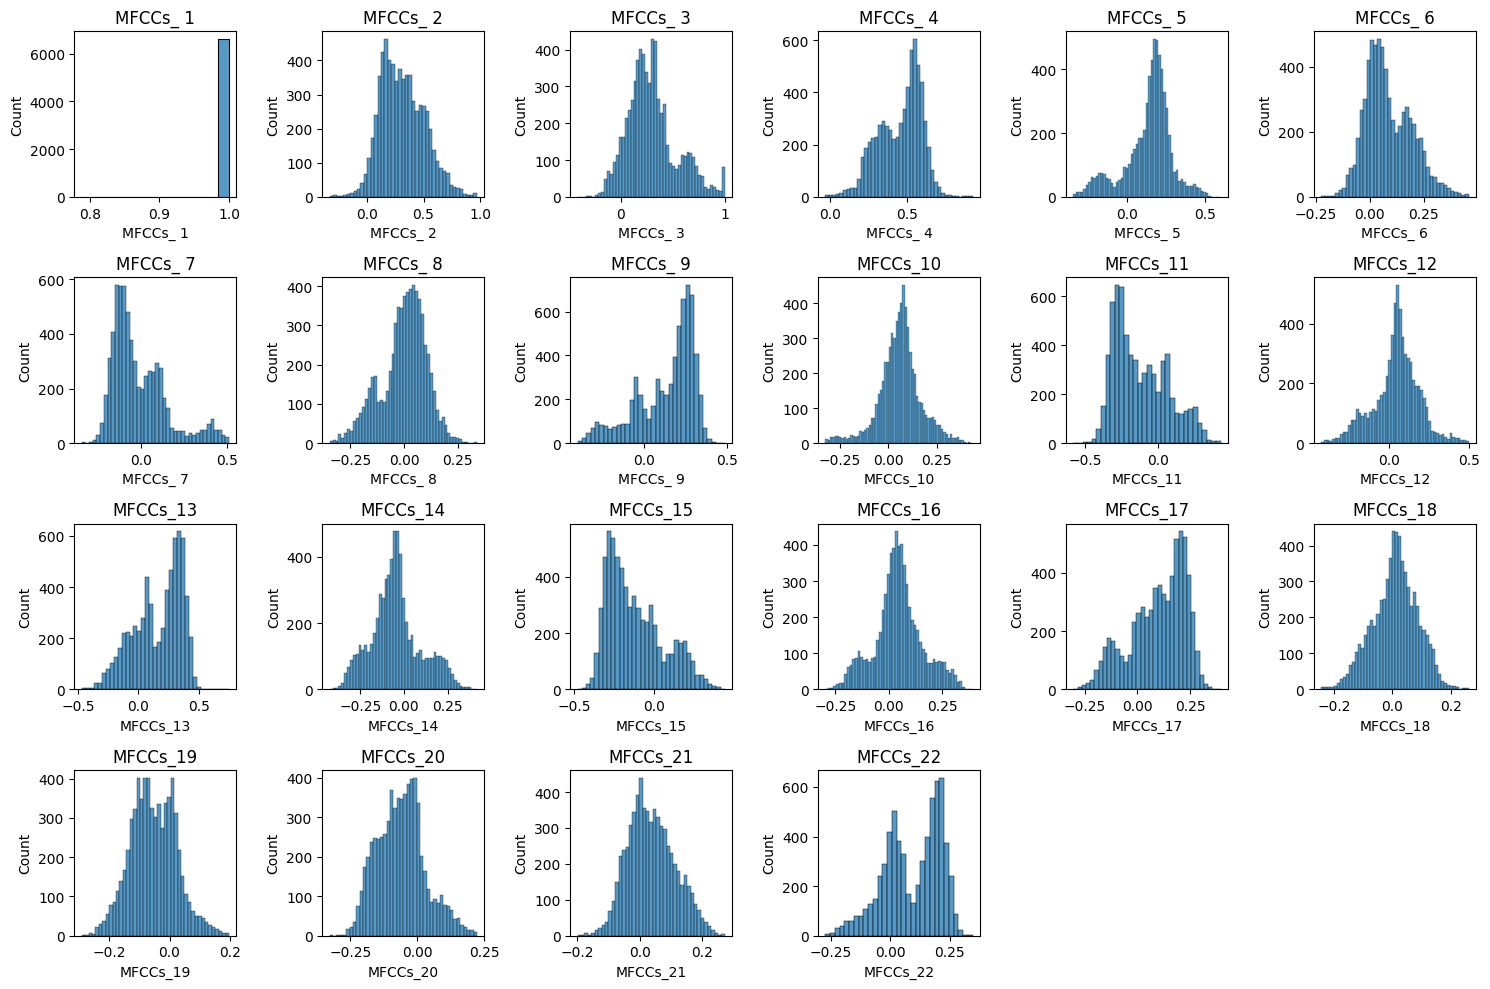

In [63]:
# z-score calculation and outlier removal and count the number of outliers removed in each feature
outliers = dict()
df_cleaned = df.copy()
for col in df.columns:
    if col in target_col_names:
        continue

    z_score = (df[col] - df[col].mean()) / df[col].std()

    df_cleaned = df_cleaned.loc[z_score.abs() <= 3]

print(df_cleaned.shape)

# visualize the distribution of the features after z-score calculation and outlier removal
X_df_cleaned = df_cleaned.drop(['Family', 'Genus', 'Species', 'RecordID'], axis=1)
plt.figure(figsize=(15, 10))
for i, col in enumerate(X_df_cleaned.columns):
    plt.subplot(4, 6, i+1)
    sns.histplot(X_df_cleaned[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Another way to remove outliers is to find the points that lie outside the range:

[*Q1 - 1.5\*IQR, Q3 + 1.5\*IQR*]

In [ ]:
# # remove the outliers
# q1 = X_df.quantile(.25)
# q3 = X_df.quantile(.75)
# IQR = q3-q1

# print(X_df.shape)

In [ ]:
# # outliers_df = np.logical_or((df[cont_feature_col] < (q1 - 1.5 * IQR)), (df[cont_feature_col] > (q3 + 1.5 * IQR)))
# outliers_df = (X_df < (q1 - 1.5 * IQR)) | (X_df > (q3 + 1.5 * IQR))

# outlier_list = []
# total_outlier = []
# for col in list(outliers_df.columns):
#     try:
#         total_outlier.append(outliers_df[col].value_counts()[True])
#         outlier_list.append((outliers_df[col].value_counts()[True] / outliers_df[col].value_counts().sum()) * 100)
#     except:
#         outlier_list.append(0)
#         total_outlier.append(0)

# outlier_df = pd.DataFrame(zip(list(outliers_df.columns), total_outlier, outlier_list), columns=['name of the column', 'total', 'outlier(%)'])

# outlier_df.set_index('name of the column', inplace=True)
# outlier_df

In [ ]:
# out_nan_df = X_df[~outliers_df]
# out_nan_df

In [ ]:
# # fill NaN with column means
# X_df = out_nan_df.fillna(out_nan_df.mean())

### Feature Engineering

We will add squared features for very low variance features


In [64]:
# display variance of each feature
X_df_cleaned.var()

MFCCs_ 1    0.000133
MFCCs_ 2    0.037798
MFCCs_ 3    0.056250
MFCCs_ 4    0.019893
MFCCs_ 5    0.023161
MFCCs_ 6    0.011542
MFCCs_ 7    0.025647
MFCCs_ 8    0.011235
MFCCs_ 9    0.030388
MFCCs_10    0.012018
MFCCs_11    0.034402
MFCCs_12    0.020744
MFCCs_13    0.039887
MFCCs_14    0.020528
MFCCs_15    0.031446
MFCCs_16    0.012843
MFCCs_17    0.017025
MFCCs_18    0.006020
MFCCs_19    0.005874
MFCCs_20    0.008028
MFCCs_21    0.005695
MFCCs_22    0.014148
dtype: float64

Increasing the power for MFCCs_ 1 increases the variance, hence we will use the power 4 for it

In [65]:
# MFCCs_1 has very low variance, let us see if squaring it improves the variance
X_df_cleaned['MFCCs_1_pow4'] = X_df_cleaned['MFCCs_ 1']**4
X_df_cleaned['MFCCs_1_pow4'].var()

# drop the original MFCCs_1 column
X_df_cleaned.drop('MFCCs_ 1', axis=1, inplace=True)

df_cleaned_final = pd.concat([X_df_cleaned, y_df], axis=1)
df_cleaned_final.head()

,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,MFCCs_1_pow4,Family,Genus,Species
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,1.0,Leptodactylidae,Adenomera,AdenomeraAndre
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,1.0,Leptodactylidae,Adenomera,AdenomeraAndre
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,1.0,Leptodactylidae,Adenomera,AdenomeraAndre
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,1.0,Leptodactylidae,Adenomera,AdenomeraAndre
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,1.0,Leptodactylidae,Adenomera,AdenomeraAndre


In [72]:
# NORMALIZATION
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = df_cleaned_final.copy()
df_scaled[X_df_cleaned.columns] = scaler.fit_transform(df_cleaned_final[X_df_cleaned.columns])

df_scaled.head()


,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,MFCCs_1_pow4,Family,Genus,Species
0,-0.820030,-1.713689,-1.792794,1.203716,1.615583,0.703538,-1.404721,-1.751879,0.586877,1.664177,...,-1.589823,-1.118952,0.569073,1.304071,1.081072,-0.674144,0.085733,Leptodactylidae,Adenomera,AdenomeraAndre
1,-0.724362,-1.685812,-1.312740,1.344809,1.686231,0.453063,-2.087937,-1.961651,1.008398,2.107949,...,-1.456633,-0.846828,0.233261,0.885009,0.598447,-0.547881,0.085733,Leptodactylidae,Adenomera,AdenomeraAndre
2,-0.823215,-1.618336,-1.180127,0.933061,0.955606,0.127579,-2.274372,-2.027400,1.570853,2.081562,...,-1.147879,-0.422533,-0.176701,0.380232,0.821694,-0.143408,0.085733,Leptodactylidae,Adenomera,AdenomeraAndre
3,-0.452459,-0.766742,-0.880170,1.564399,2.548719,0.169963,-1.822554,-1.333384,1.916024,2.088110,...,-1.801815,-2.400300,-1.008894,0.048911,-0.739468,-0.590773,0.085733,Leptodactylidae,Adenomera,AdenomeraAndre
4,-1.155004,-1.556655,-1.039459,1.293888,1.507414,0.116150,-2.493164,-1.760898,1.880070,2.440825,...,-1.134030,-0.802541,-0.461536,0.310332,0.947613,-0.125903,0.085733,Leptodactylidae,Adenomera,AdenomeraAndre


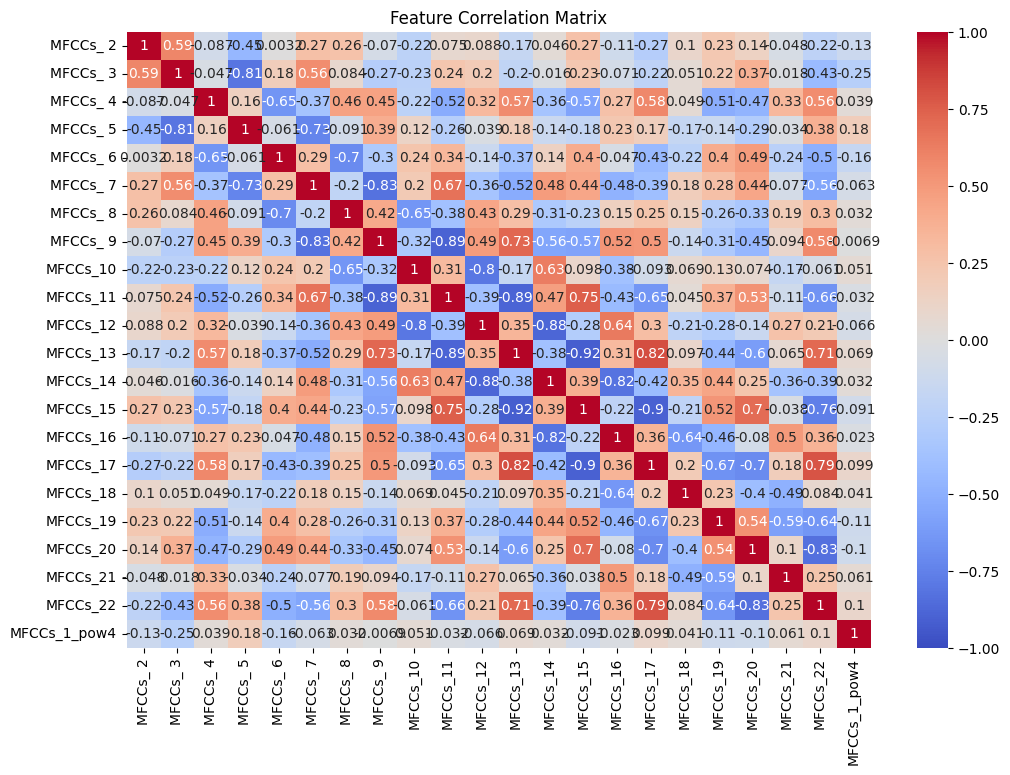

In [73]:
X_df_scaled = df_scaled.drop(['Family', 'Genus', 'Species'], axis=1)

corr_matrix = X_df_scaled.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

corr_matrix = corr_matrix.abs()

### Feature Correlation Analysis

Removing highly correlated features so that clustering results are improved

In [84]:
# Find the features that are highly correlated

threshold = 0.85

cols_to_drop = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            cols_to_drop.append(colname)
            print(f'{colname} is highly correlated with {corr_matrix.index[j]} with a correlation of {corr_matrix.iloc[i, j]}')

print(f'Number of columns to drop: {len(cols_to_drop)}')

# Drop the highly correlated features
X_df_scaled_reduced = X_df_scaled.drop(cols_to_drop, axis=1)
print(X_df_scaled_reduced.shape)

MFCCs_11 is highly correlated with MFCCs_ 9 with a correlation of 0.8914511554128447
MFCCs_13 is highly correlated with MFCCs_11 with a correlation of 0.8892640288933747
MFCCs_14 is highly correlated with MFCCs_12 with a correlation of 0.8768672293358284
MFCCs_15 is highly correlated with MFCCs_13 with a correlation of 0.9189255757481882
MFCCs_17 is highly correlated with MFCCs_15 with a correlation of 0.9047368228646081
Number of columns to drop: 5
(6668, 17)


## K-Means Clustering

The following methods will be used for the clustering:
- *Elbow-Method* 
- *Silhouette Score Evalutation* 
- *Cluster Implementation* 

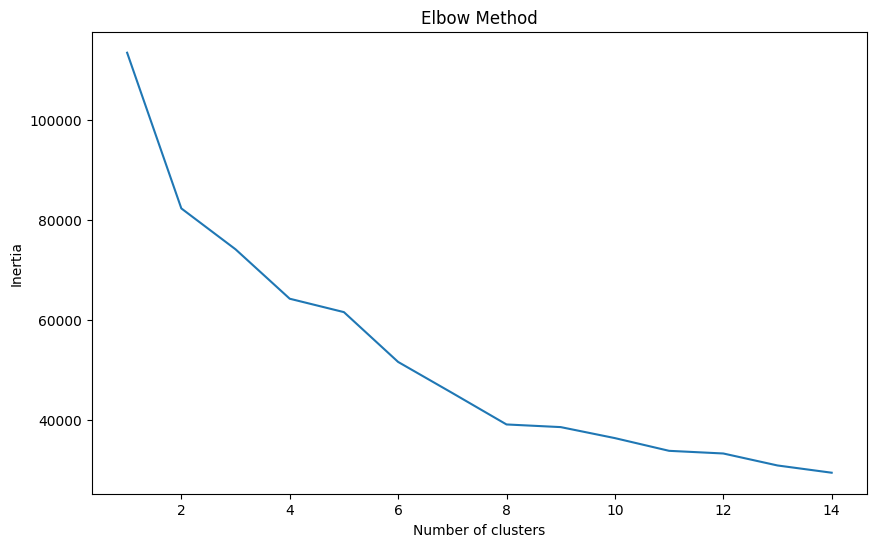

In [87]:
# Elbow Method

from sklearn.cluster import KMeans

inertia = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_df_scaled_reduced)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

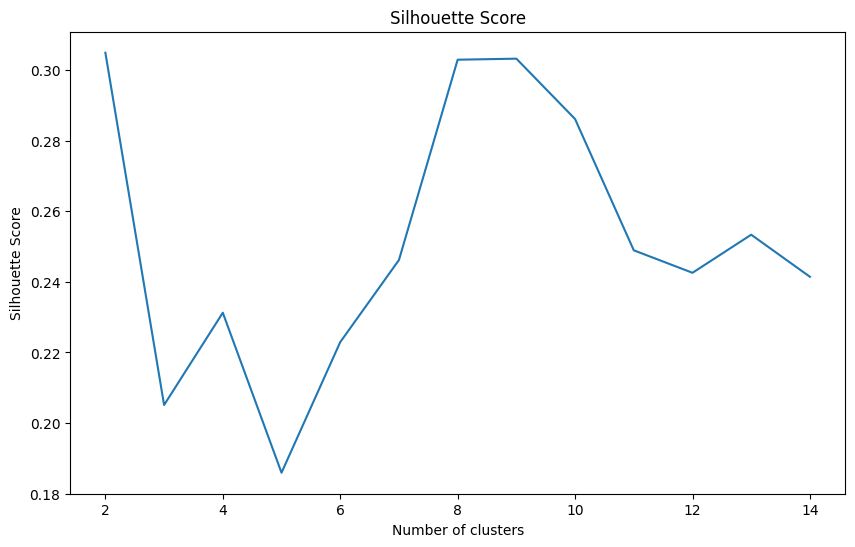

In [89]:
# Silhouette Score Evaluation

from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_df_scaled_reduced)
    silhouette_scores.append(silhouette_score(X_df_scaled_reduced, kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



As we can see, we get an elbow point number of clusters = 8 (since the decrease in inertia is the least after 8, meaning it somewhat stabilizes). Another verification is given the Silhouette score, which obtains a peak at the value 8.

In [90]:
optimal_k = 8

In [91]:
# KMeans Clustering with Random Initialization
kmeans_random = KMeans(n_clusters=optimal_k, init='random', random_state=42)

kmean_random_cluster = kmeans_random.fit_predict(X_df_scaled_reduced)
silhouette_score_random = silhouette_score(X_df_scaled_reduced, kmean_random_cluster)

print(f'Silhouette Score for Random Initialization: {silhouette_score_random}')

# KMeans Clustering with KMeans++ Initialization

kmeans_p_p = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_p_p_cluster = kmeans_p_p.fit_predict(X_df_scaled_reduced)
silhouette_score_p_p = silhouette_score(X_df_scaled_reduced, kmeans_p_p_cluster)

print(f'Silhouette Score for KMeans++ Initialization: {silhouette_score_p_p}')

Silhouette Score for Random Initialization: 0.2535129107760996
Silhouette Score for KMeans++ Initialization: 0.28519271039240923


### Visualizing the Clusters

We will first perform Principal Component Analysis so that we can easily visualize in 2 dimensions (and not in more than 3 diminensions). There are 2 candidates for dimensionality reduction, PCA and t-SNE, out of which, I will be using PCA

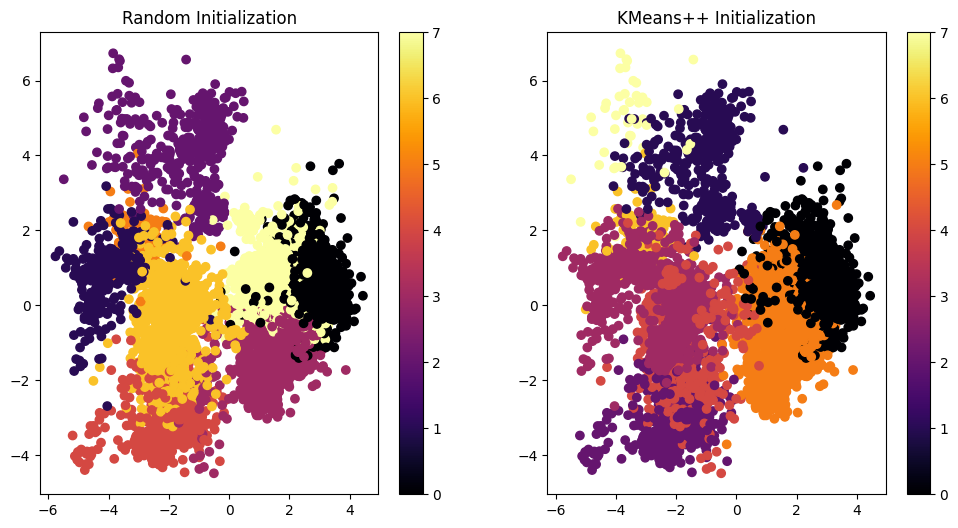

In [95]:
# plot the clusters using 2 principal components for both random and kmeans++ initialization

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_df_scaled_reduced)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Random Initialization')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmean_random_cluster, cmap='inferno')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('KMeans++ Initialization')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_p_p_cluster, cmap='inferno')
plt.colorbar()

plt.show()


### Feature Contribution to Clustering


In [108]:
# for both the random and k-means++ initializations, we will find the contribution of each feature to each cluster
# by calculating the mean of each feature for each cluster

def find_feature_importance(kmeans, X_df_scaled_reduced):
    # getting the cluster centroids
    cluster_centroids = kmeans.cluster_centers_

    # getting the mean of the features
    mean_df = X_df_scaled_reduced.mean().values

    # calculate the difference between the cluster centroids and the mean of the features
    diff = abs(cluster_centroids - mean_df)

    importance = pd.DataFrame({
        'Feature': X_df_scaled_reduced.columns, 
        'Importance': diff.sum(axis=0)
    })

    return importance

In [111]:
importance_random = find_feature_importance(kmeans_random, X_df_scaled_reduced).sort_values(by='Importance', ascending=False)
importance_p_p = find_feature_importance(kmeans_p_p, X_df_scaled_reduced).sort_values(by='Importance', ascending=False)



print(importance_random)
print('\n')
print(importance_p_p)

         Feature  Importance
3       MFCCs_ 5    7.952494
15      MFCCs_22    7.659137
1       MFCCs_ 3    7.552999
9       MFCCs_12    7.460843
5       MFCCs_ 7    7.318815
4       MFCCs_ 6    7.118138
8       MFCCs_10    6.886936
7       MFCCs_ 9    6.774628
13      MFCCs_20    6.409445
2       MFCCs_ 4    6.131235
6       MFCCs_ 8    6.049418
10      MFCCs_16    5.910161
12      MFCCs_19    5.498133
11      MFCCs_18    5.309048
0       MFCCs_ 2    4.915820
14      MFCCs_21    4.067616
16  MFCCs_1_pow4    1.735791


         Feature  Importance
16  MFCCs_1_pow4   11.975872
1       MFCCs_ 3    9.396425
3       MFCCs_ 5    8.025785
9       MFCCs_12    7.680319
15      MFCCs_22    7.610757
4       MFCCs_ 6    6.854106
8       MFCCs_10    6.696820
7       MFCCs_ 9    6.418170
12      MFCCs_19    6.410222
5       MFCCs_ 7    6.404108
13      MFCCs_20    6.079427
2       MFCCs_ 4    5.751266
10      MFCCs_16    5.594580
11      MFCCs_18    5.515923
6       MFCCs_ 8    5.387221
0       MFCC

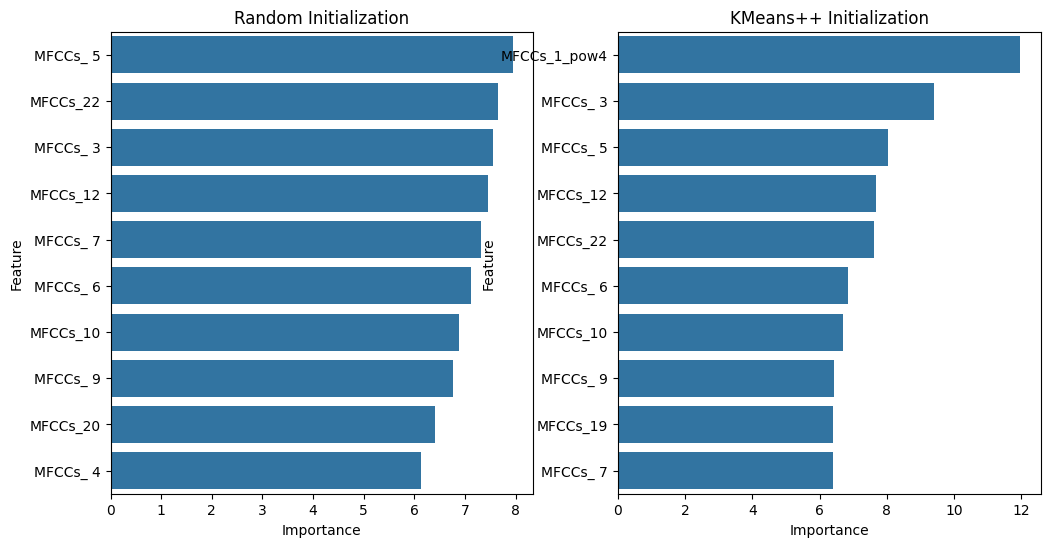

In [112]:
# plot the 10 most important features for each cluster using importance_random and importance_p_p
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Random Initialization')
sns.barplot(x='Importance', y='Feature', data=importance_random.head(10))

plt.subplot(1, 2, 2)
plt.title('KMeans++ Initialization')
sns.barplot(x='Importance', y='Feature', data=importance_p_p.head(10))

plt.show()

### Cluster Quality Evaluation

We will look at the quality of cluster using 2 metrics: Davies-Bouldin Index, and Calinski-Harabasz Index

Using these indices, we will verify that the optimal_k is indeed optimal and hence these indices can be used as a validation for the Elbow and Sihouette Methods

In [123]:
# calculating the DB index and CH index for kmeans++ initialization

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

db_index_kmeans_p_p = None
ch_index_kmeans_p_p = None

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_df_scaled_reduced)

    db_index = davies_bouldin_score(X_df_scaled_reduced, kmeans.labels_)
    ch_index = calinski_harabasz_score(X_df_scaled_reduced, kmeans.labels_)

    if i == optimal_k:
        db_index_kmeans_p_p = db_index
        ch_index_kmeans_p_p = ch_index

    print(f'{i}, DB Index: {db_index}, CH Index: {ch_index}')

2, DB Index: 1.470841865973286, CH Index: 2518.2376913351573
3, DB Index: 1.5364512817282465, CH Index: 1883.0525732728838
4, DB Index: 1.738278469639139, CH Index: 1611.5623235930616
5, DB Index: 1.420856070096328, CH Index: 1521.1046976845341
6, DB Index: 1.3634847647429387, CH Index: 1345.3148501437558
7, DB Index: 1.3767569820419328, CH Index: 1471.662072838528
8, DB Index: 1.2910386731860442, CH Index: 1751.4021098828036
9, DB Index: 1.275738149054905, CH Index: 1698.9731520737644
10, DB Index: 1.458788136406018, CH Index: 1522.3435404327224
11, DB Index: 1.5016560805129193, CH Index: 1518.547577290621
12, DB Index: 1.541347623455273, CH Index: 1467.8504323658738
13, DB Index: 1.4577353895726808, CH Index: 1464.0392987043556
14, DB Index: 1.4052754916824546, CH Index: 1497.2209656610055


DB Index: measures average similarity between a cluster and its most similar cluster, thus a lower value suggests better k 

CH Index: measures ratio of between-cluster dispersion and within-cluster dispersion, thus a higher value suggests better k

Hence, seeing the above index values, we can see that DB score is least for 9 (and also for 8), and the CH score is highest for k=8, thus validating the hypothesis of optimal-k given by Elbow and Silhouette methods


### Agglomerative Hierarchical Clustering


In [124]:
# using agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=optimal_k)
agg_cluster = agg.fit_predict(X_df_scaled_reduced)

In [125]:
# using DBSCAN to group data points based on density
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_df_scaled_reduced)


In [126]:
# compare the clustering results of KMeans, Agglomerative Clustering, and DBSCAN
# using the silhouette score, DB Index, and CH index

silhouette_score_agg = silhouette_score(X_df_scaled_reduced, agg_cluster)
silhouette_score_dbscan = silhouette_score(X_df_scaled_reduced, dbscan_clusters)

db_index_agg = davies_bouldin_score(X_df_scaled_reduced, agg_cluster)
db_index_dbscan = davies_bouldin_score(X_df_scaled_reduced, dbscan_clusters)

ch_index_agg = calinski_harabasz_score(X_df_scaled_reduced, agg_cluster)
ch_index_dbscan = calinski_harabasz_score(X_df_scaled_reduced, dbscan_clusters)

metrics_df = pd.DataFrame({
    'Model': ['KMeans++', 'Agglomerative Clustering', 'DBSCAN'],
    'Silhouette Score': [silhouette_score_p_p, silhouette_score_agg, silhouette_score_dbscan],
    'DB Index': [db_index_kmeans_p_p, db_index_agg, db_index_dbscan],
    'CH Index': [ch_index_kmeans_p_p, ch_index_agg, ch_index_dbscan]
})

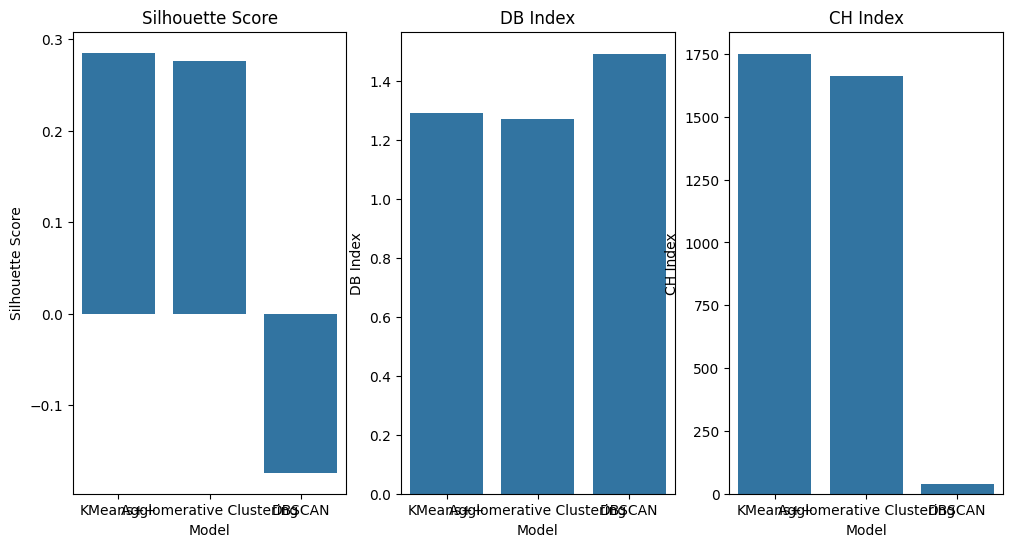

In [127]:
# visualize the metrics_df
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Silhouette Score')
sns.barplot(x='Model', y='Silhouette Score', data=metrics_df)

plt.subplot(1, 3, 2)
plt.title('DB Index')
sns.barplot(x='Model', y='DB Index', data=metrics_df)

plt.subplot(1, 3, 3)
plt.title('CH Index')
sns.barplot(x='Model', y='CH Index', data=metrics_df)

plt.show()
